In [1]:
using ForwardDiff
using Plots
using Random

using ProgressMeter

wait_for_key(prompt) = (print(stdout, prompt); read(stdin, 1); nothing)

wait_for_key (generic function with 1 method)

In [2]:
function norm(a)
    sqrt.(sum(a.^2))
end

norm (generic function with 1 method)

In [3]:
function horner(a,x)
    r = 0.0
    for i = length(a):-1:2
       r = x*(a[i]+r)
    end
    return a[1]+r
end

horner (generic function with 1 method)

In [4]:
function hornerb(b,x)
    r = 0.0
    for i = length(b):-1:1
       r = x*(b[i]+r)
    end
    return 1+r
end

hornerb (generic function with 1 method)

In [5]:
a = [-10,1,2]
b = [1,4,-1]

p = vcat(a,b)

6-element Vector{Int64}:
 -10
   1
   2
   1
   4
  -1

In [6]:
a = [-10,1,2]
b = [1,4,-1]

p = vcat(a,b)

pade(p,x) = horner(p[1:length(a)],x)/hornerb(p[length(a)+1:end],x)

pade (generic function with 1 method)

In [7]:
xdata = collect(range(-10,10,10000))
a = [-10,1,2]
a0 = zeros(3)
ydata = (x->pade(p,x)).(xdata);

In [8]:
E(p) = sum(( ((xx->pade(p,xx)).(xdata)) - ydata).^2)
∇E(p) = ForwardDiff.gradient(E,p)

∇E (generic function with 1 method)

In [9]:
function grad_descent(lr,p0,it=1000)
    p = p0
    i = 0
    @showprogress for i in 1:it
        grad = ∇E(p)
        grad /= norm(grad)
        p -= lr*grad
        i += 1
    end
    p
end

grad_descent (generic function with 2 methods)

In [10]:
p0 = zeros(length(p))

6-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [11]:
grad_descent(0.01,p0)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:09


6-element Vector{Float64}:
 -0.1215364177643715
  0.13610078043021828
  0.10031640750173418
 -0.028841544189772614
 -0.06505255150391269
  0.10995139354637967

# Optimizador Adam

In [21]:
"""
Optimizador Adam, tal como está descrito en https://arxiv.org/abs/1412.6980

Los parámetros son α, β1 y β2 y ϵ que por defecto son los sugeridos en el paper:
    α = 1e-4
    β1 = 0.9
    β2 = 0.999
    ϵ = 1e-8
"""
function adam_optimizer(p0,α=1e-4,β1=0.9,β2=0.999,tolerance=1e-3,ϵ=1e-8)
    p = p0
    t = 1

    e = []
    
    m = zeros(length(p0))
    v = zeros(length(p0))
    
    e0 = E(p)
    Δe = e0

    while Δe > tolerance
        grad = ∇E(p)
        
        m = (β1 * m) + (1-β1)*grad
        v = (β2 * v) + (1-β2)*(grad .^ 2)
        
        m_ = m/(1-β1^t)
        v_ = v/(1-β2^t)
        
        Δp = α * (m_./(sqrt.(v_) .+ ϵ))
        
        p-= Δp
        t += 1
        
        e1 = E(p)
       
        Δe = abs(e1 - e0)
        push!(e,e0)
        e0 = e1

        if t%1000 == 0
            learningCurve = plot(e,xlabel="Steps",ylabel="E",yscale=:log10)
            display(learningCurve)
            wait_for_key("Press any key to continue...")
        end
    end
    println("The optimization has converged. Total iterations: $t")
    p
end

adam_optimizer

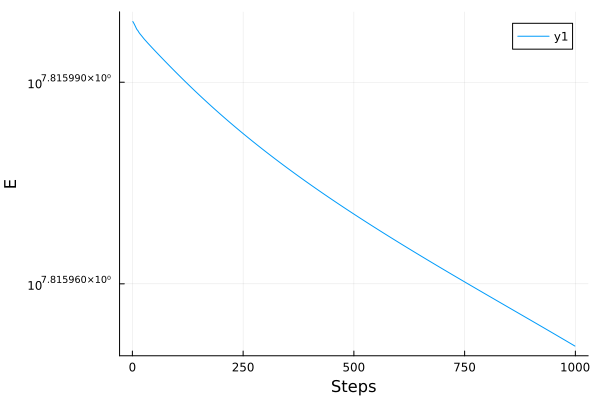

Press any key to continue...

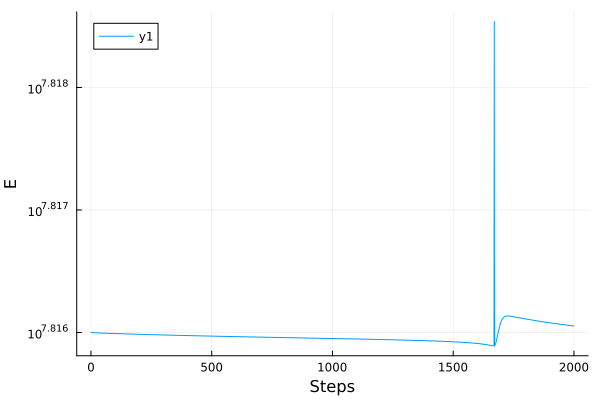

Press any key to continue...

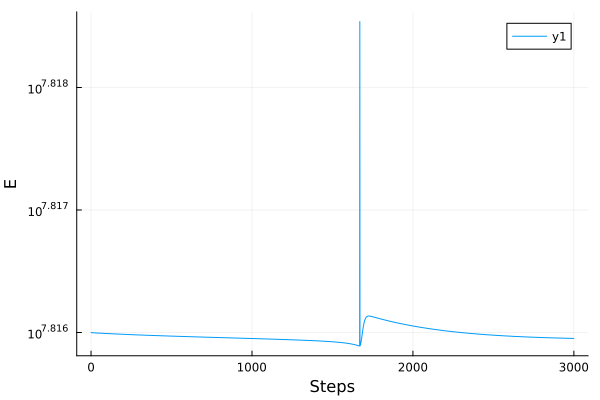

Press any key to continue...

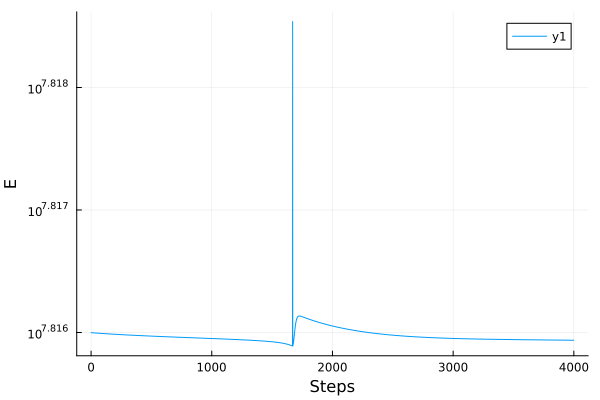

Press any key to continue...

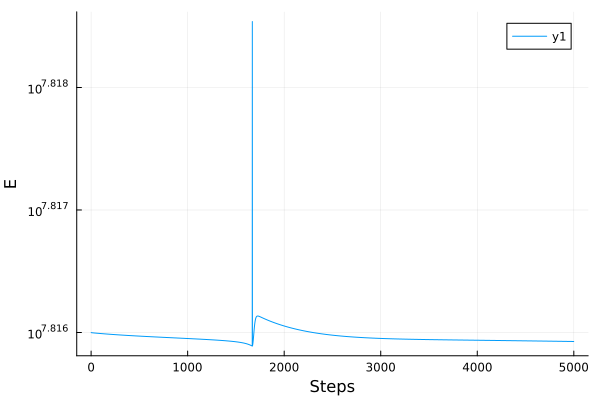

Press any key to continue...

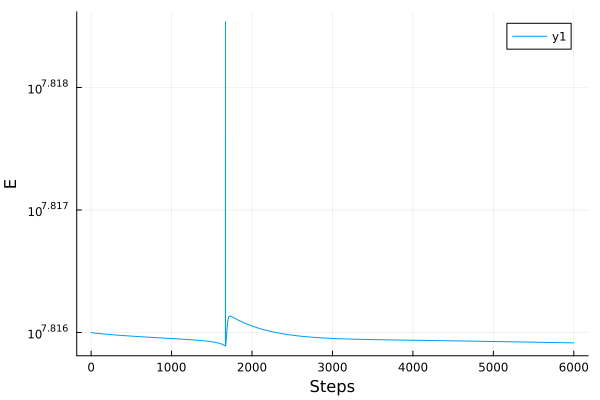

Press any key to continue...

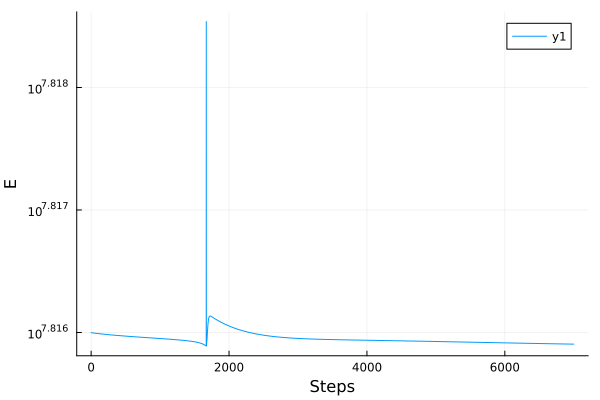

Press any key to continue...

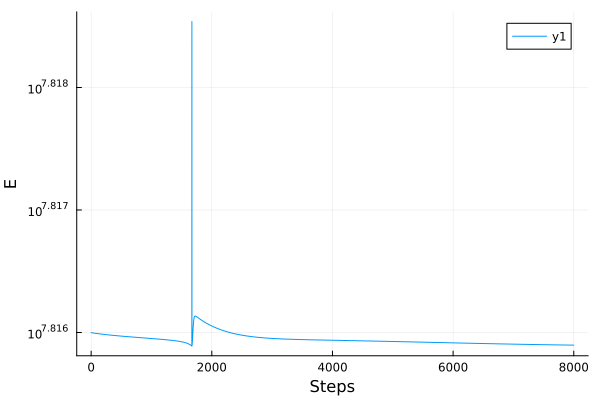

Press any key to continue...

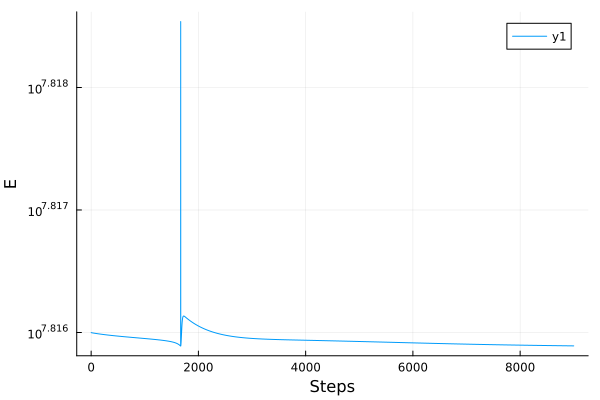

Press any key to continue...

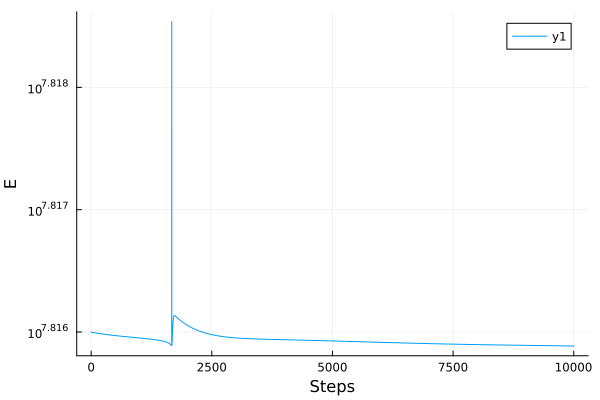

Press any key to continue...

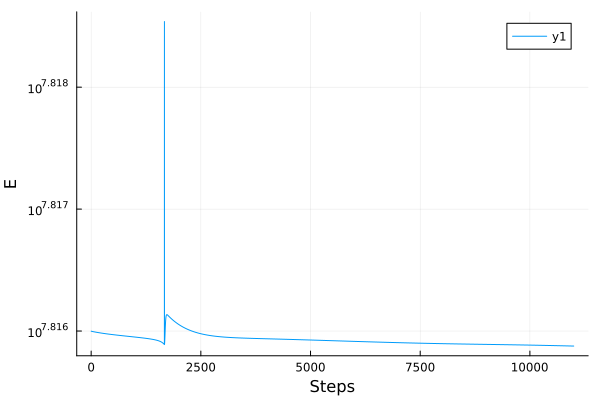

Press any key to continue...

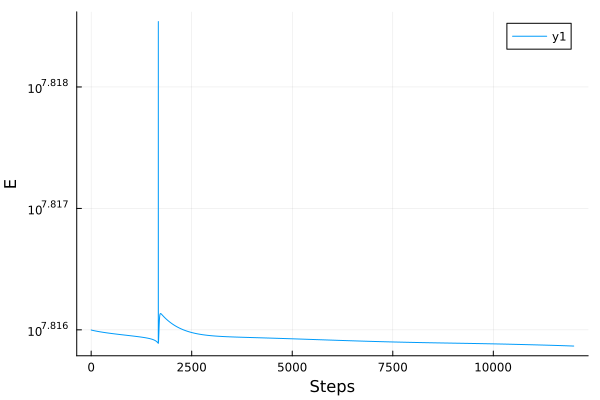

Press any key to continue...

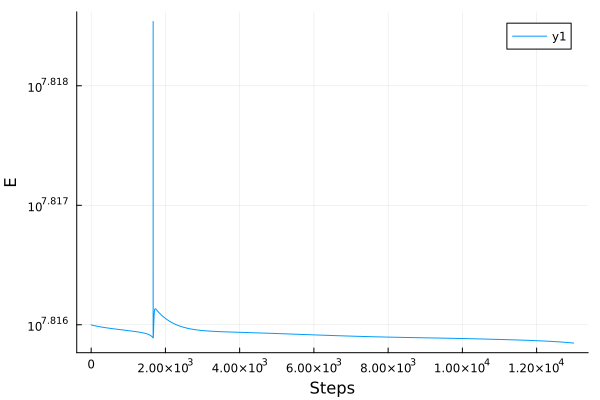

Press any key to continue...

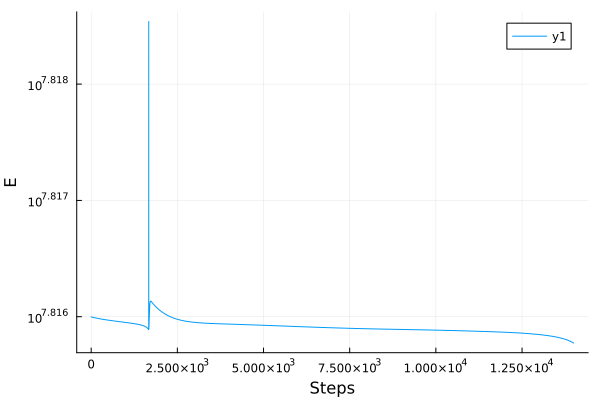

Press any key to continue...

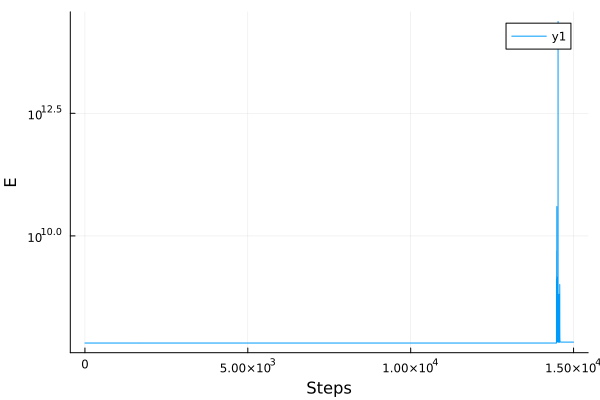

In [ ]:
@time adam_optimizer(p0)